In [14]:
import pandas as pd
from sklearn.mixture import GaussianMixture

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_data.csv")
data

,Gender_Female,Gender_Male,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,Year Group_class of 2024,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,...,What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),Where do you prefer to do homework/study?_Away from the room,Where do you prefer to do homework/study?_In the room,What do you enjoy doing for fun?_Going for events on/off-campus,What do you enjoy doing for fun?_Hanging out with friends,What do you enjoy doing for fun?_Relaxing/Sleeping,Do you enjoy having friends over in your room?_Nope!,"Do you enjoy having friends over in your room?_Not really, but I don't mind","Do you enjoy having friends over in your room?_Yup, all the time","Do you enjoy having friends over in your room?_Yup, but not always"
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
502,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
504,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
centroids = 5

In [18]:
gmm = GaussianMixture(n_components=centroids,max_iter=300,random_state=42);
gmm.fit(data)

GaussianMixture(max_iter=300, n_components=5, random_state=42)

In [19]:
data['cluster'] = gmm.predict(data)
data

,Gender_Female,Gender_Male,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,Year Group_class of 2024,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,...,Where do you prefer to do homework/study?_Away from the room,Where do you prefer to do homework/study?_In the room,What do you enjoy doing for fun?_Going for events on/off-campus,What do you enjoy doing for fun?_Hanging out with friends,What do you enjoy doing for fun?_Relaxing/Sleeping,Do you enjoy having friends over in your room?_Nope!,"Do you enjoy having friends over in your room?_Not really, but I don't mind","Do you enjoy having friends over in your room?_Yup, all the time","Do you enjoy having friends over in your room?_Yup, but not always",cluster
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
502,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
504,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3


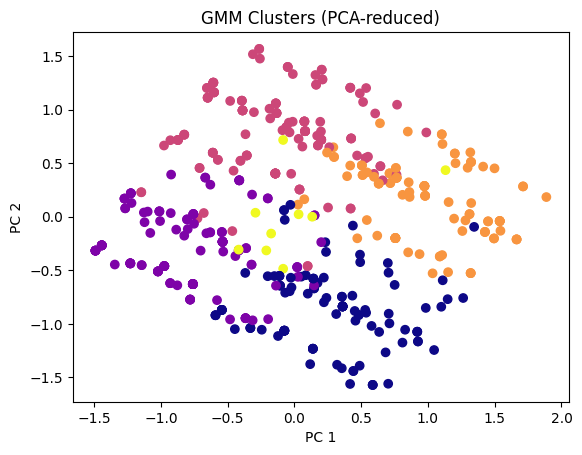

In [20]:
#Visualizing the data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(data.drop(columns=['cluster'] + [col for col in data.columns if 'prob' in col]))

plt.scatter(reduced[:, 0], reduced[:, 1], c=data['cluster'], cmap='plasma')
plt.title('GMM Clusters (PCA-reduced)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()